In [1]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from matplotlib import rcParams
rcParams['text.usetex'] = True

from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, HDBSCAN
from umap import UMAP

from src.GaussianMixture import gaussian_mixture

STYLE = 'src/custom.mplstyle' 
LATEX = True

PATH_SAVE = 'src/Results_Noise'
PATH_DATA = '/home/nicolasdc/Documents/Datasets/Photon-Number-Classification/NRC CSV'

data = pl.read_csv(f'{PATH_DATA}/Noise.csv', has_header=False, separator=",").to_numpy()

In [2]:
data.shape

(200000, 50)

### Dataset

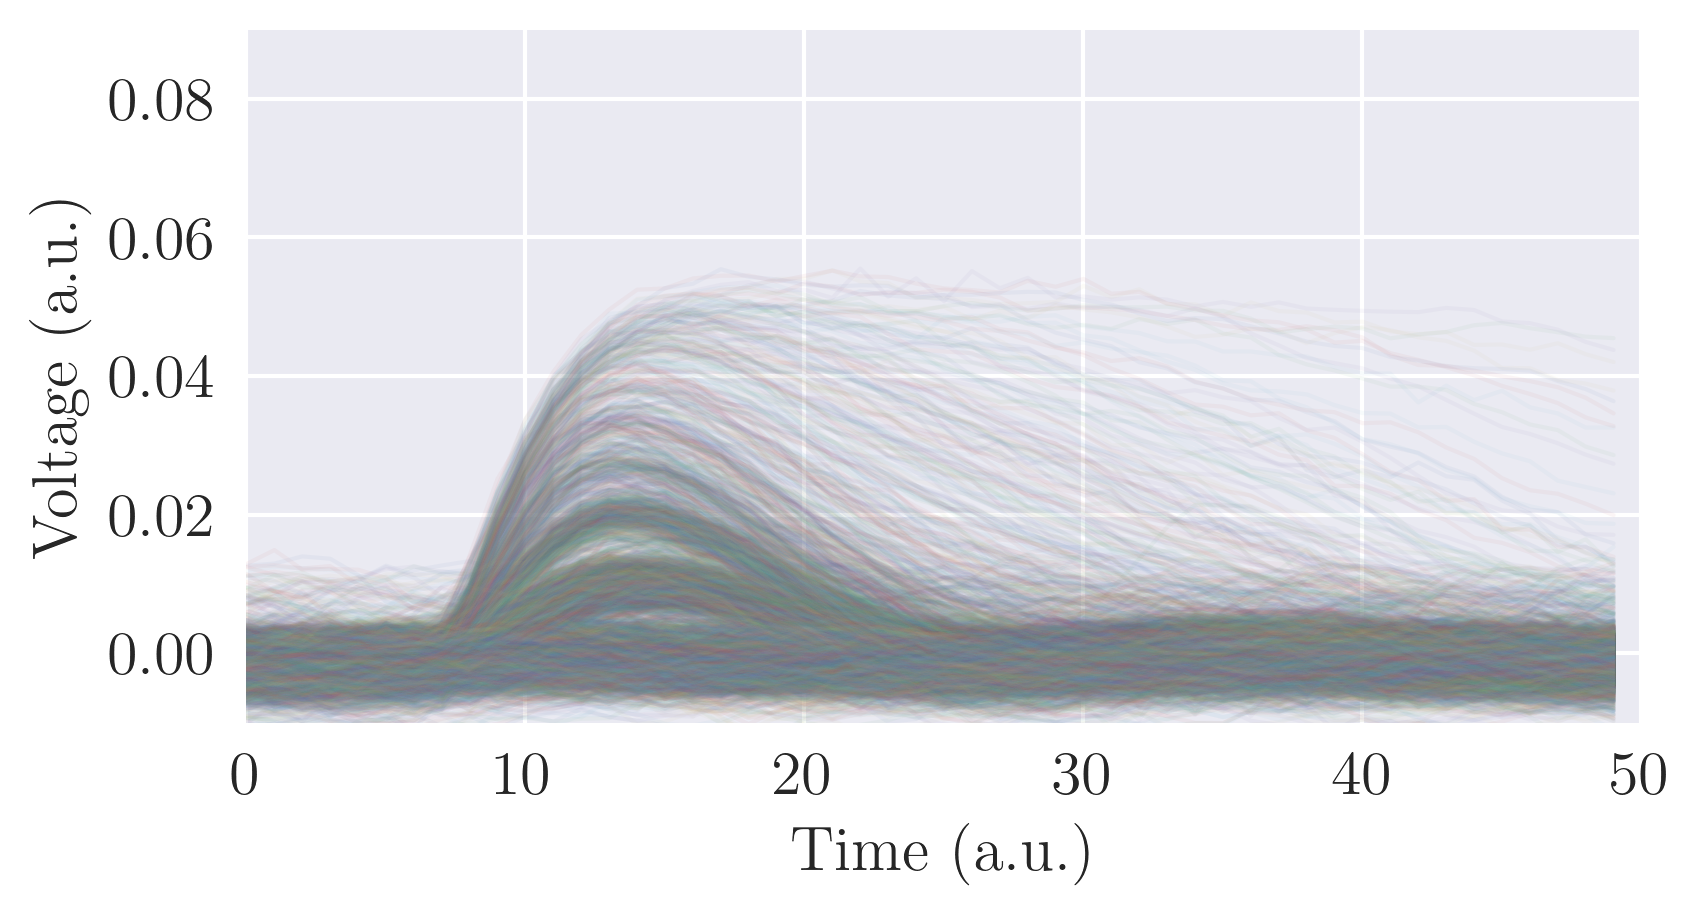

In [17]:
with plt.style.context(STYLE):
    plt.figure(figsize=(6,3), dpi=300)
    plt.plot(data[::20].T, alpha=0.05, linewidth=1)
    plt.xlim((0,50))
    plt.ylim((-0.01,0.09))
    plt.xlabel('Time (a.u.)')
    plt.ylabel('Voltage (a.u.)')
    plt.savefig(f'{PATH_SAVE}/Traces_Noise.png', bbox_inches='tight', pad_inches = 0)
    plt.show()

### UMAP

In [4]:
#emb = UMAP(n_components=2).fit_transform(data.T)
# np.save(f'{PATH_SAVE}/emb_UMAP.npy', emb)
emb = np.load(f'{PATH_SAVE}/emb_UMAP.npy')
min_ = emb.min(axis=0)
max_ = emb.max(axis=0)
emb = (emb - min_) / (max_ - min_)

### Clustering with HDBSCAN

In [5]:
# labels = HDBSCAN(min_cluster_size=200, 
#                  min_samples=None, 
#                  cluster_selection_epsilon=0.015, 
#                  max_cluster_size=None, 
#                  metric='euclidean', 
#                  metric_params=None, 
#                  alpha=1.0, 
#                  algorithm='auto', 
#                  leaf_size=40, 
#                  n_jobs=None, 
#                  cluster_selection_method='eom', 
#                  allow_single_cluster=False, 
#                  store_centers=None, 
#                  copy=False).fit(emb)
# labels_ = labels.labels_
# np.save(f'{PATH_SAVE}/labels_UMAP.npy', labels_)

In [6]:
# np.save(f'{PATH_SAVE}/labels_UMAP.npy', labels_)

In [7]:
labels_ = np.load(f'{PATH_SAVE}/labels_UMAP.npy', allow_pickle=True)

In [8]:
# gm = gaussian_mixture(X_low = emb[::5],
#                       X_high = data.T[::5],
#                       number_cluster = 2,
#                       cluster_iter =1,
#                       means_init = None,
#                       tol = 1e-1,
#                       width_plot = 6,
#                       height_plot = 6,
#                       style = STYLE,
#                       latex = LATEX)

# gm.plot_density(bw_adjust = 0.1,
#                 plot_gaussians = False,
#                 cluster_number = False,
#                 text = "UMAP 2D",
#                 save_path = 'src/Noise/')

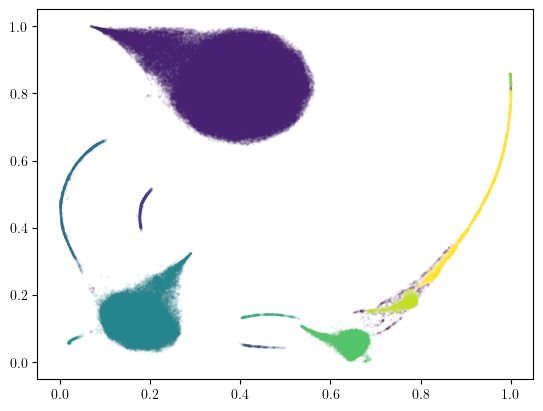

In [9]:
plt.scatter(emb[:,0],emb[:,1], c=labels_, s=1, alpha=0.05)
plt.show()

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


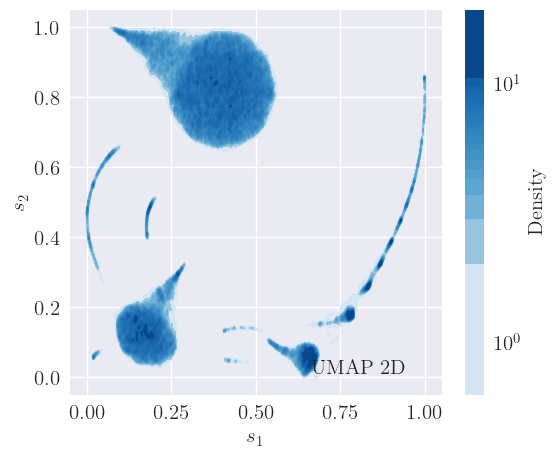

In [10]:
gm = gaussian_mixture(X_low = emb,
                      X_high = data,
                      number_cluster = 2,
                      cluster_iter =1,
                      means_init = None,
                      tol = 1e-1,
                      width_plot = 6,
                      height_plot = 5,
                      style = STYLE,
                      latex = LATEX)

gm.plot_density(bw_adjust = 0.1,
                cluster_number = False,
                plot_gaussians = False,
                text = "   UMAP 2D",
                save_path = 'src/Results_Noise/')

In [11]:
cluster_area = np.array([np.trapz(data[labels_ == i], axis=0).mean() for i in range(20)])
sorted_idx = cluster_area.argsort()

(133126, 50)


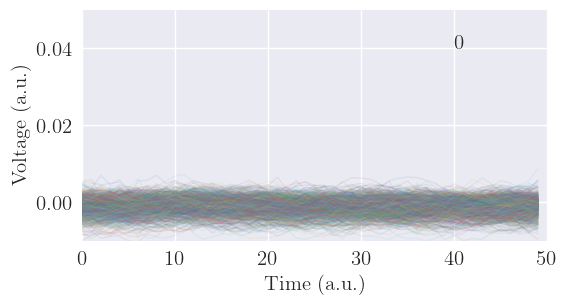

(0, 50)


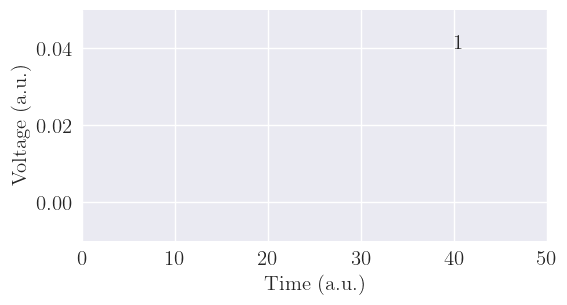

(0, 50)


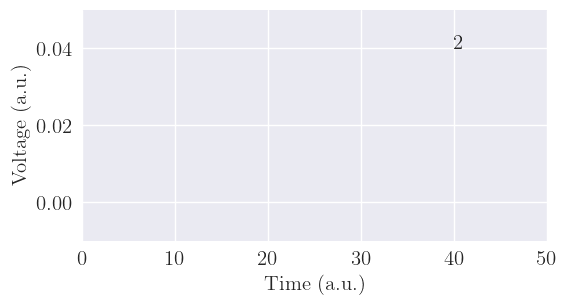

(0, 50)


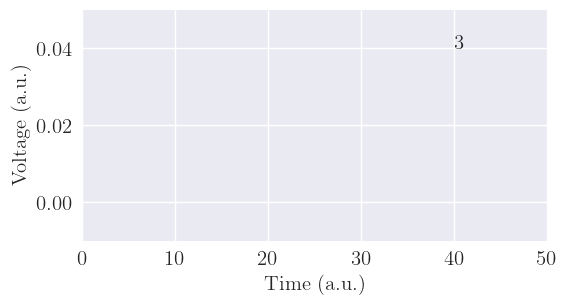

(0, 50)


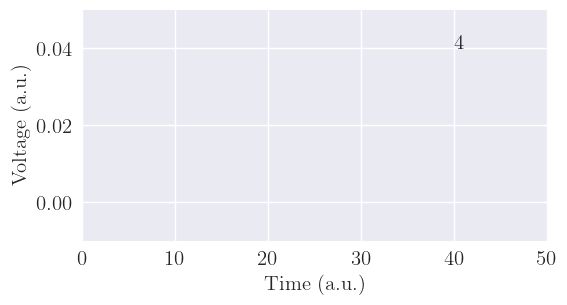

(0, 50)


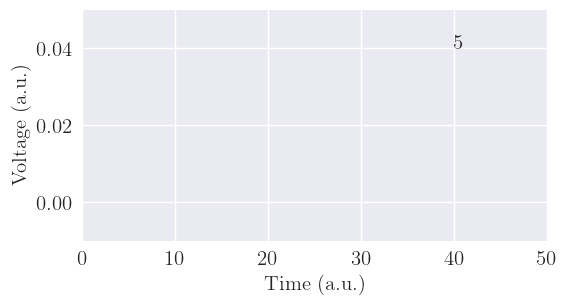

(0, 50)


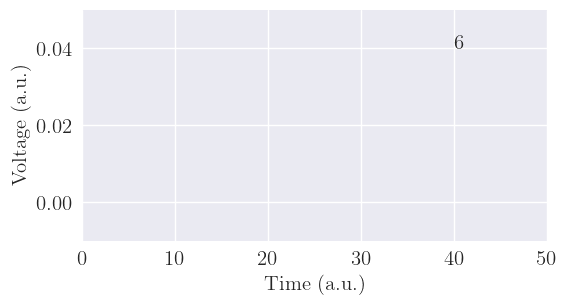

(0, 50)


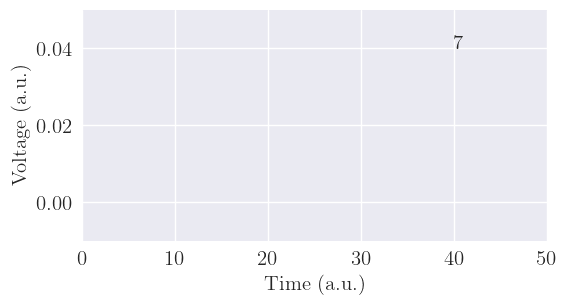

(0, 50)


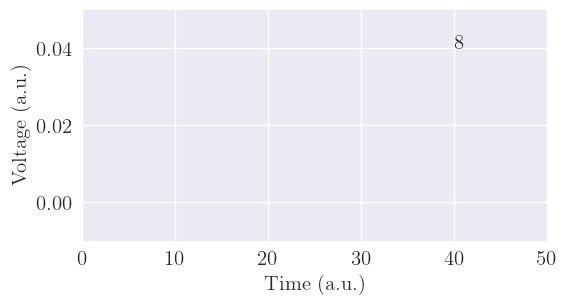

(0, 50)


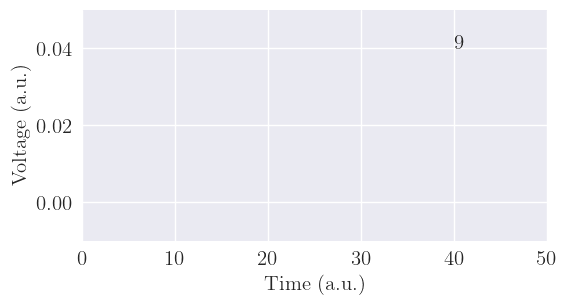

(307, 50)


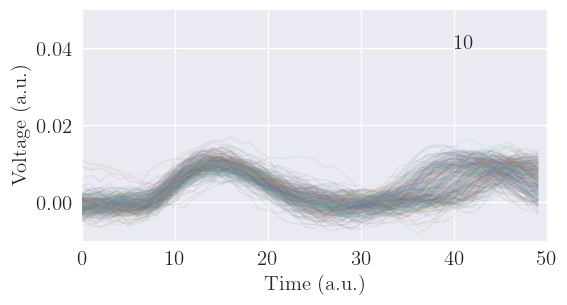

(327, 50)


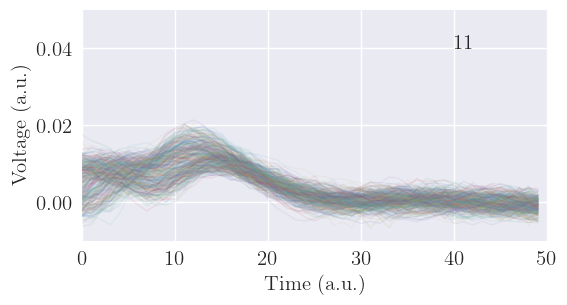

(1159, 50)


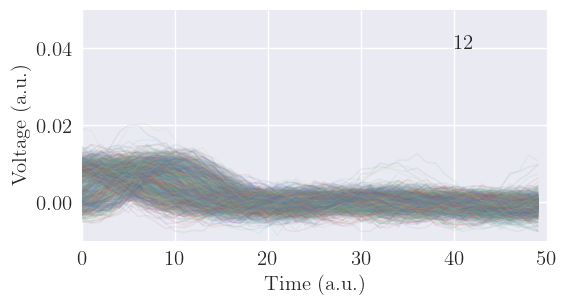

(548, 50)


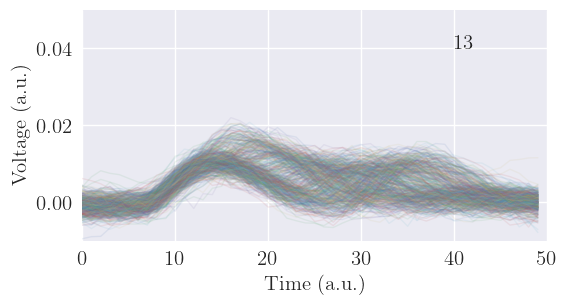

(2638, 50)


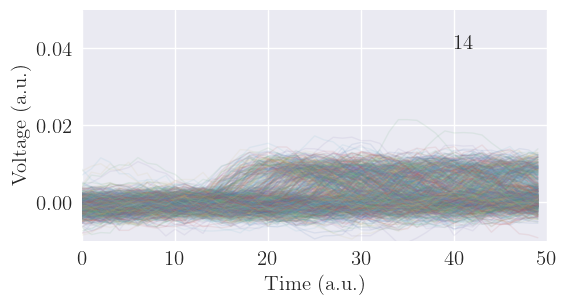

(240, 50)


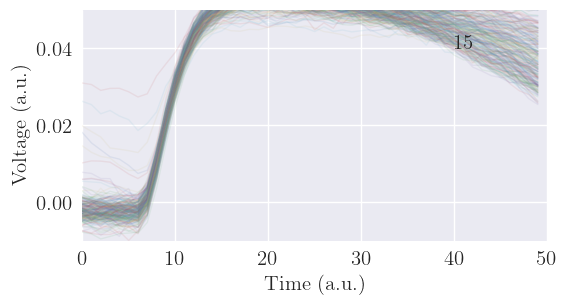

(3153, 50)


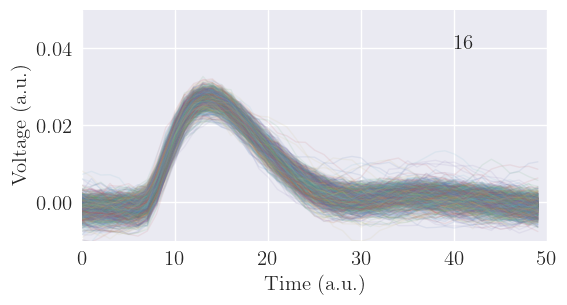

(10382, 50)


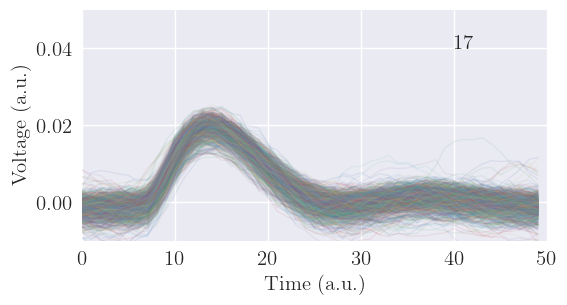

(41983, 50)


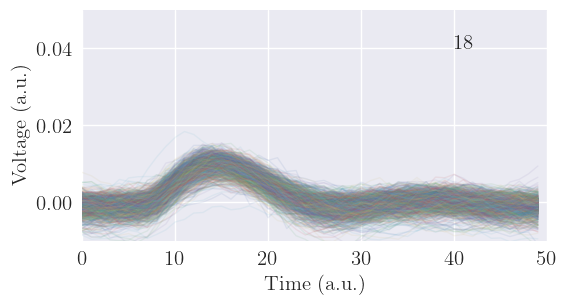

(5429, 50)


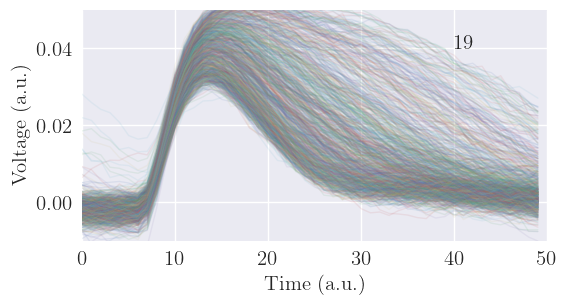

In [12]:
n_cluster = 20
n_signals = 1000

with plt.style.context(STYLE):
    for idx, sort in enumerate(sorted_idx):
        data_ = data[labels_ == sort]
        print(data_.shape)
        plt.figure(figsize=(6,3), dpi=100)
        if data_.shape[0] < n_signals: 
            n = data_.shape[0]
        else:
            n = n_signals
        plt.plot(data_[:n].T, alpha=0.1, linewidth=1)
        plt.xlim((0,50))
        plt.ylim((-0.01,0.05))
        plt.xlabel('Time (a.u.)')
        plt.ylabel('Voltage (a.u.)')
        plt.text(40,0.04,str(idx))
        plt.savefig(f'{PATH_SAVE}/cluster {idx}.png', bbox_inches='tight', pad_inches = 0)
        plt.show()

### PCA 

In [13]:
# emb = PCA(n_components=2).fit_transform(data.T)
# np.save(f'{path}/emb_PCA2D.npy', emb)
emb = np.load(f'{PATH_SAVE}/emb_PCA2D.npy')

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


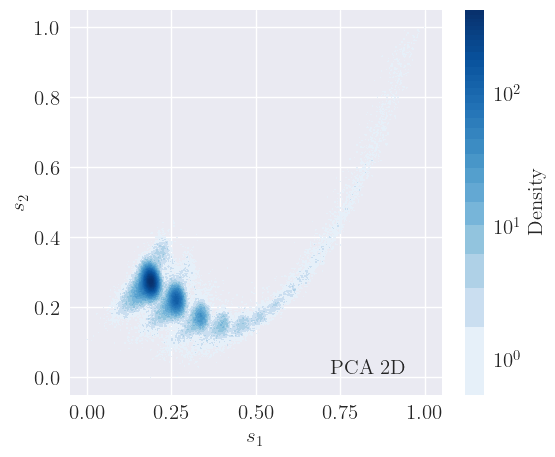

In [14]:
gm = gaussian_mixture(X_low = emb,
                      X_high = data,
                      number_cluster = 2,
                      cluster_iter =1,
                      means_init = None,
                      tol = 1e-1,
                      width_plot = 6,
                      height_plot = 5,
                      style = STYLE,
                      latex = LATEX)

gm.plot_density(bw_adjust = 0.1,
                cluster_number = False,
                plot_gaussians = False,
                text = "PCA 2D",
                save_path = 'src/Results_Noise/')

In [15]:
# emb = PCA(n_components=1).fit_transform(data.T)
# np.save(f'{path}/emb_PCA1D.npy', emb)
emb = np.load(f'{PATH_SAVE}/emb_PCA1D.npy')

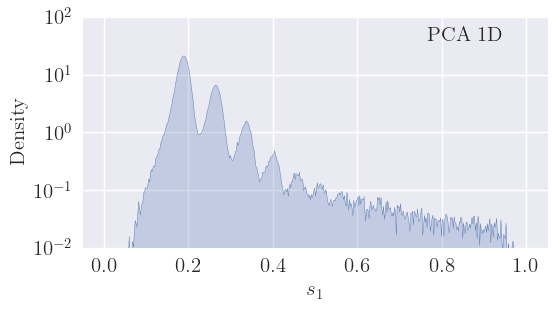

In [16]:
gm = gaussian_mixture(X_low = emb,
                      X_high = data,
                      number_cluster = 28,
                      cluster_iter = 5,
                      means_init = None,
                      tol = 1e-4,
                      width_plot = 6,
                      height_plot = 3,
                      style = STYLE,
                      latex = LATEX)
gm.plot_density(bw_adjust = 0.09,
                plot_gaussians = False,
                text = "PCA 1D",
                save_path = 'src/Results_Noise/',
                cluster_number = False)